In [3]:
import pandas as pd 
pd.set_option('display.float_format', '{:.2f}'.format)

import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df= pd.read_csv('data/movies.csv')

for col in df.columns:
    pct_missing =  np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)





name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [16]:
#df = df.sort_values(by=['gross'],inplace=False,ascending=False 
# print(df.dtypes)

In [17]:
# look for duplicates in the data and drop them

df['company'].drop_duplicates().sort_values(ascending=False)
# List of columns to convert to integers
columns_to_convert = ['budget', 'gross',]

# Convert the specified columns to integers
df[columns_to_convert] = df[columns_to_convert].astype(int)
df = df.sort_values(by=['gross'],inplace=False,ascending=False)



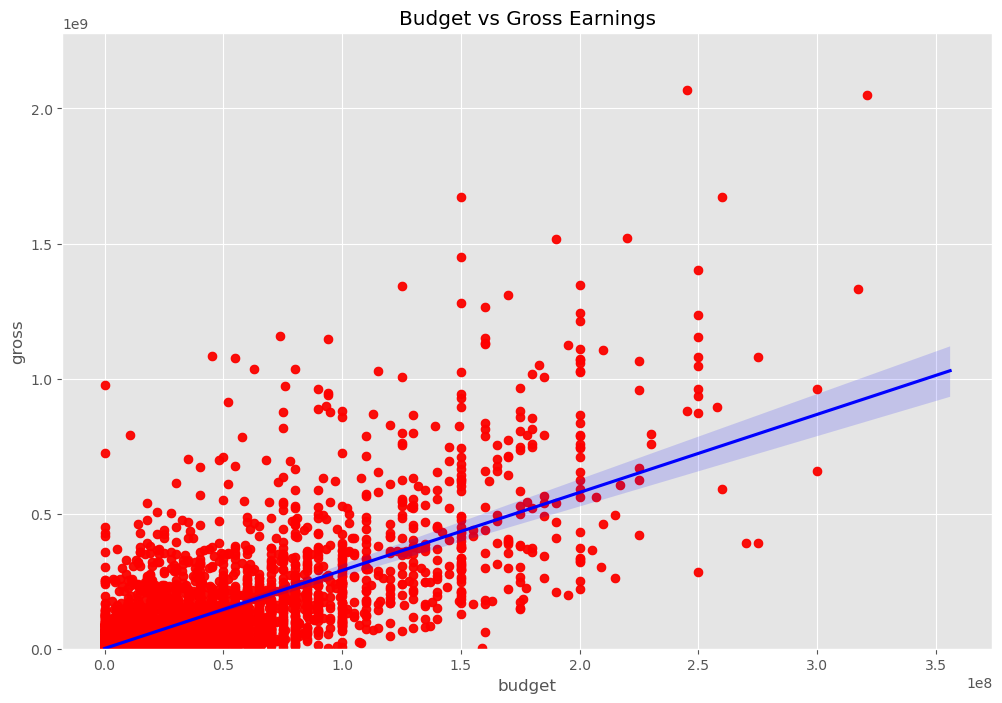

In [6]:
# compare budget and gross revenue using scatter plot wtih regression line

plt.scatter(x=df['budget'], y=df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs Gross Earnings')
plt.ylim(bottom=0)
sns.regplot(data=df,x='budget',y='gross',scatter_kws=dict(color="red"), line_kws=dict(color="blue"))
plt.ylim(0)
plt.show()

In [7]:
# looking at correlation
correlation_matrix = df[['budget', 'gross', 'year', 'runtime', 'score', 'votes']].corr()
correlation_matrix

,budget,gross,year,runtime,score,votes
budget,1.00,0.69,0.31,0.27,0.06,0.49
gross,0.69,1.00,0.26,0.20,0.17,0.57
year,0.31,0.26,1.00,0.12,0.10,0.22
runtime,0.27,0.20,0.12,1.00,0.40,0.31
score,0.06,0.17,0.10,0.40,1.00,0.41
votes,0.49,0.57,0.22,0.31,0.41,1.00


In [18]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        

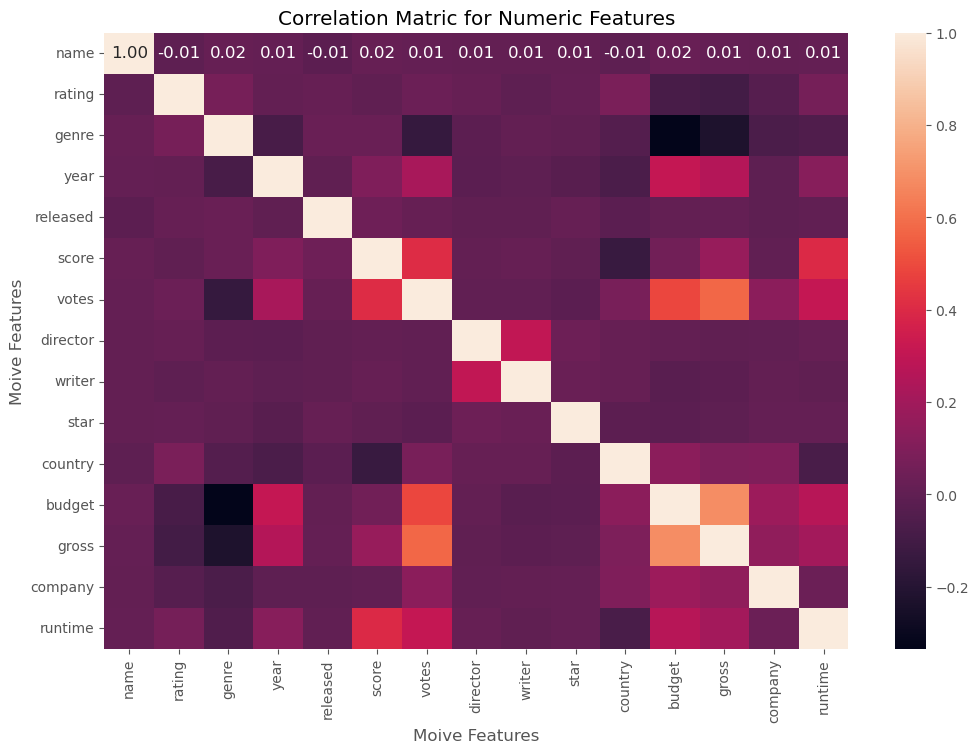

In [14]:
# looking at correlation using a heatmap
correlation_matrix = df_numerized.corr()
correlation_matrix
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", annot_kws={"size": 12})
plt.xlabel('Moive Features')
plt.ylabel('Moive Features')
plt.title('Correlation Matric for Numeric Features')

plt.show()

In [11]:
correlation_matrix = df_numerized.corr()
correlation_matrix

# note that budget, gross,and votes are the only ones that meet the requirements for Pearson correlation. You could make
# an argument for years and runtime. 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.00,-0.01,0.02,0.01,-0.01,0.02,0.01,0.01,0.01,0.01,-0.01,0.02,0.01,0.01,0.01
rating,-0.01,1.00,0.07,0.01,0.02,-0.00,0.03,0.02,-0.01,0.01,0.08,-0.08,-0.10,-0.03,0.06
genre,0.02,0.07,1.00,-0.08,0.03,0.03,-0.15,-0.02,0.01,-0.01,-0.04,-0.33,-0.23,-0.07,-0.05
year,0.01,0.01,-0.08,1.00,-0.00,0.10,0.22,-0.02,-0.01,-0.03,-0.07,0.31,0.26,-0.01,0.12
released,-0.01,0.02,0.03,-0.00,1.00,0.04,0.02,-0.00,-0.00,0.02,-0.02,0.01,0.01,-0.01,0.00
score,0.02,-0.00,0.03,0.10,0.04,1.00,0.41,0.01,0.02,-0.00,-0.13,0.06,0.17,0.00,0.40
votes,0.01,0.03,-0.15,0.22,0.02,0.41,1.00,0.00,0.00,-0.02,0.07,0.49,0.57,0.13,0.31
director,0.01,0.02,-0.02,-0.02,-0.00,0.01,0.00,1.00,0.30,0.04,0.02,0.00,-0.01,0.00,0.02
writer,0.01,-0.01,0.01,-0.01,-0.00,0.02,0.00,0.30,1.00,0.03,0.02,-0.03,-0.02,0.01,-0.00
star,0.01,0.01,-0.01,-0.03,0.02,-0.00,-0.02,0.04,0.03,1.00,-0.01,-0.02,-0.01,0.01,0.01


In [12]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()


In [13]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes     gross      0.57
gross     votes      0.57
budget    gross      0.69
gross     budget     0.69
name      name       1.00
director  director   1.00
gross     gross      1.00
budget    budget     1.00
country   country    1.00
star      star       1.00
writer    writer     1.00
votes     votes      1.00
score     score      1.00
released  released   1.00
year      year       1.00
genre     genre      1.00
rating    rating     1.00
company   company    1.00
runtime   runtime    1.00
dtype: float64